In [101]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()


In [102]:
df['property_type']=l.fit_transform(df['property_type'])
df['location']=l.fit_transform(df['location'])
df['city']=l.fit_transform(df['city'])
df['province_name']=l.fit_transform(df['province_name'])
df['area']=l.fit_transform(df['area'])
df['purpose']=l.fit_transform(df['purpose'])
df['Area Type']=l.fit_transform(df['Area Type'])
df['Area Category']=l.fit_transform(df['Area Category'])


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  168446 non-null  int32  
 1   price          168446 non-null  int64  
 2   location       168446 non-null  int32  
 3   city           168446 non-null  int32  
 4   province_name  168446 non-null  int32  
 5   baths          168446 non-null  int64  
 6   area           168446 non-null  int32  
 7   purpose        168446 non-null  int32  
 8   bedrooms       168446 non-null  int64  
 9   Area Type      168446 non-null  int32  
 10  Area Size      168446 non-null  float64
 11  Area Category  168446 non-null  int32  
dtypes: float64(1), int32(8), int64(3)
memory usage: 10.3 MB


In [104]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=.2,random_state=0)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=.5,random_state=0)

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
r=DecisionTreeRegressor(max_depth=3)
r.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [109]:
test_pred=r.predict(x_test)

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
m=mean_squared_error

In [112]:
test_loss=m(y_test,test_pred)
print(f"test_loss:{test_loss:5f}")

test_loss:0.039834


In [113]:
train_loss=m(y_train,r.predict(x_train))
val_loss=m(y_val,r.predict(x_val))
test_loss=m(y_test,r.predict(x_test))

In [114]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,test_pred)

In [115]:
r2

0.9988305949888502

In [116]:
import seaborn as sns

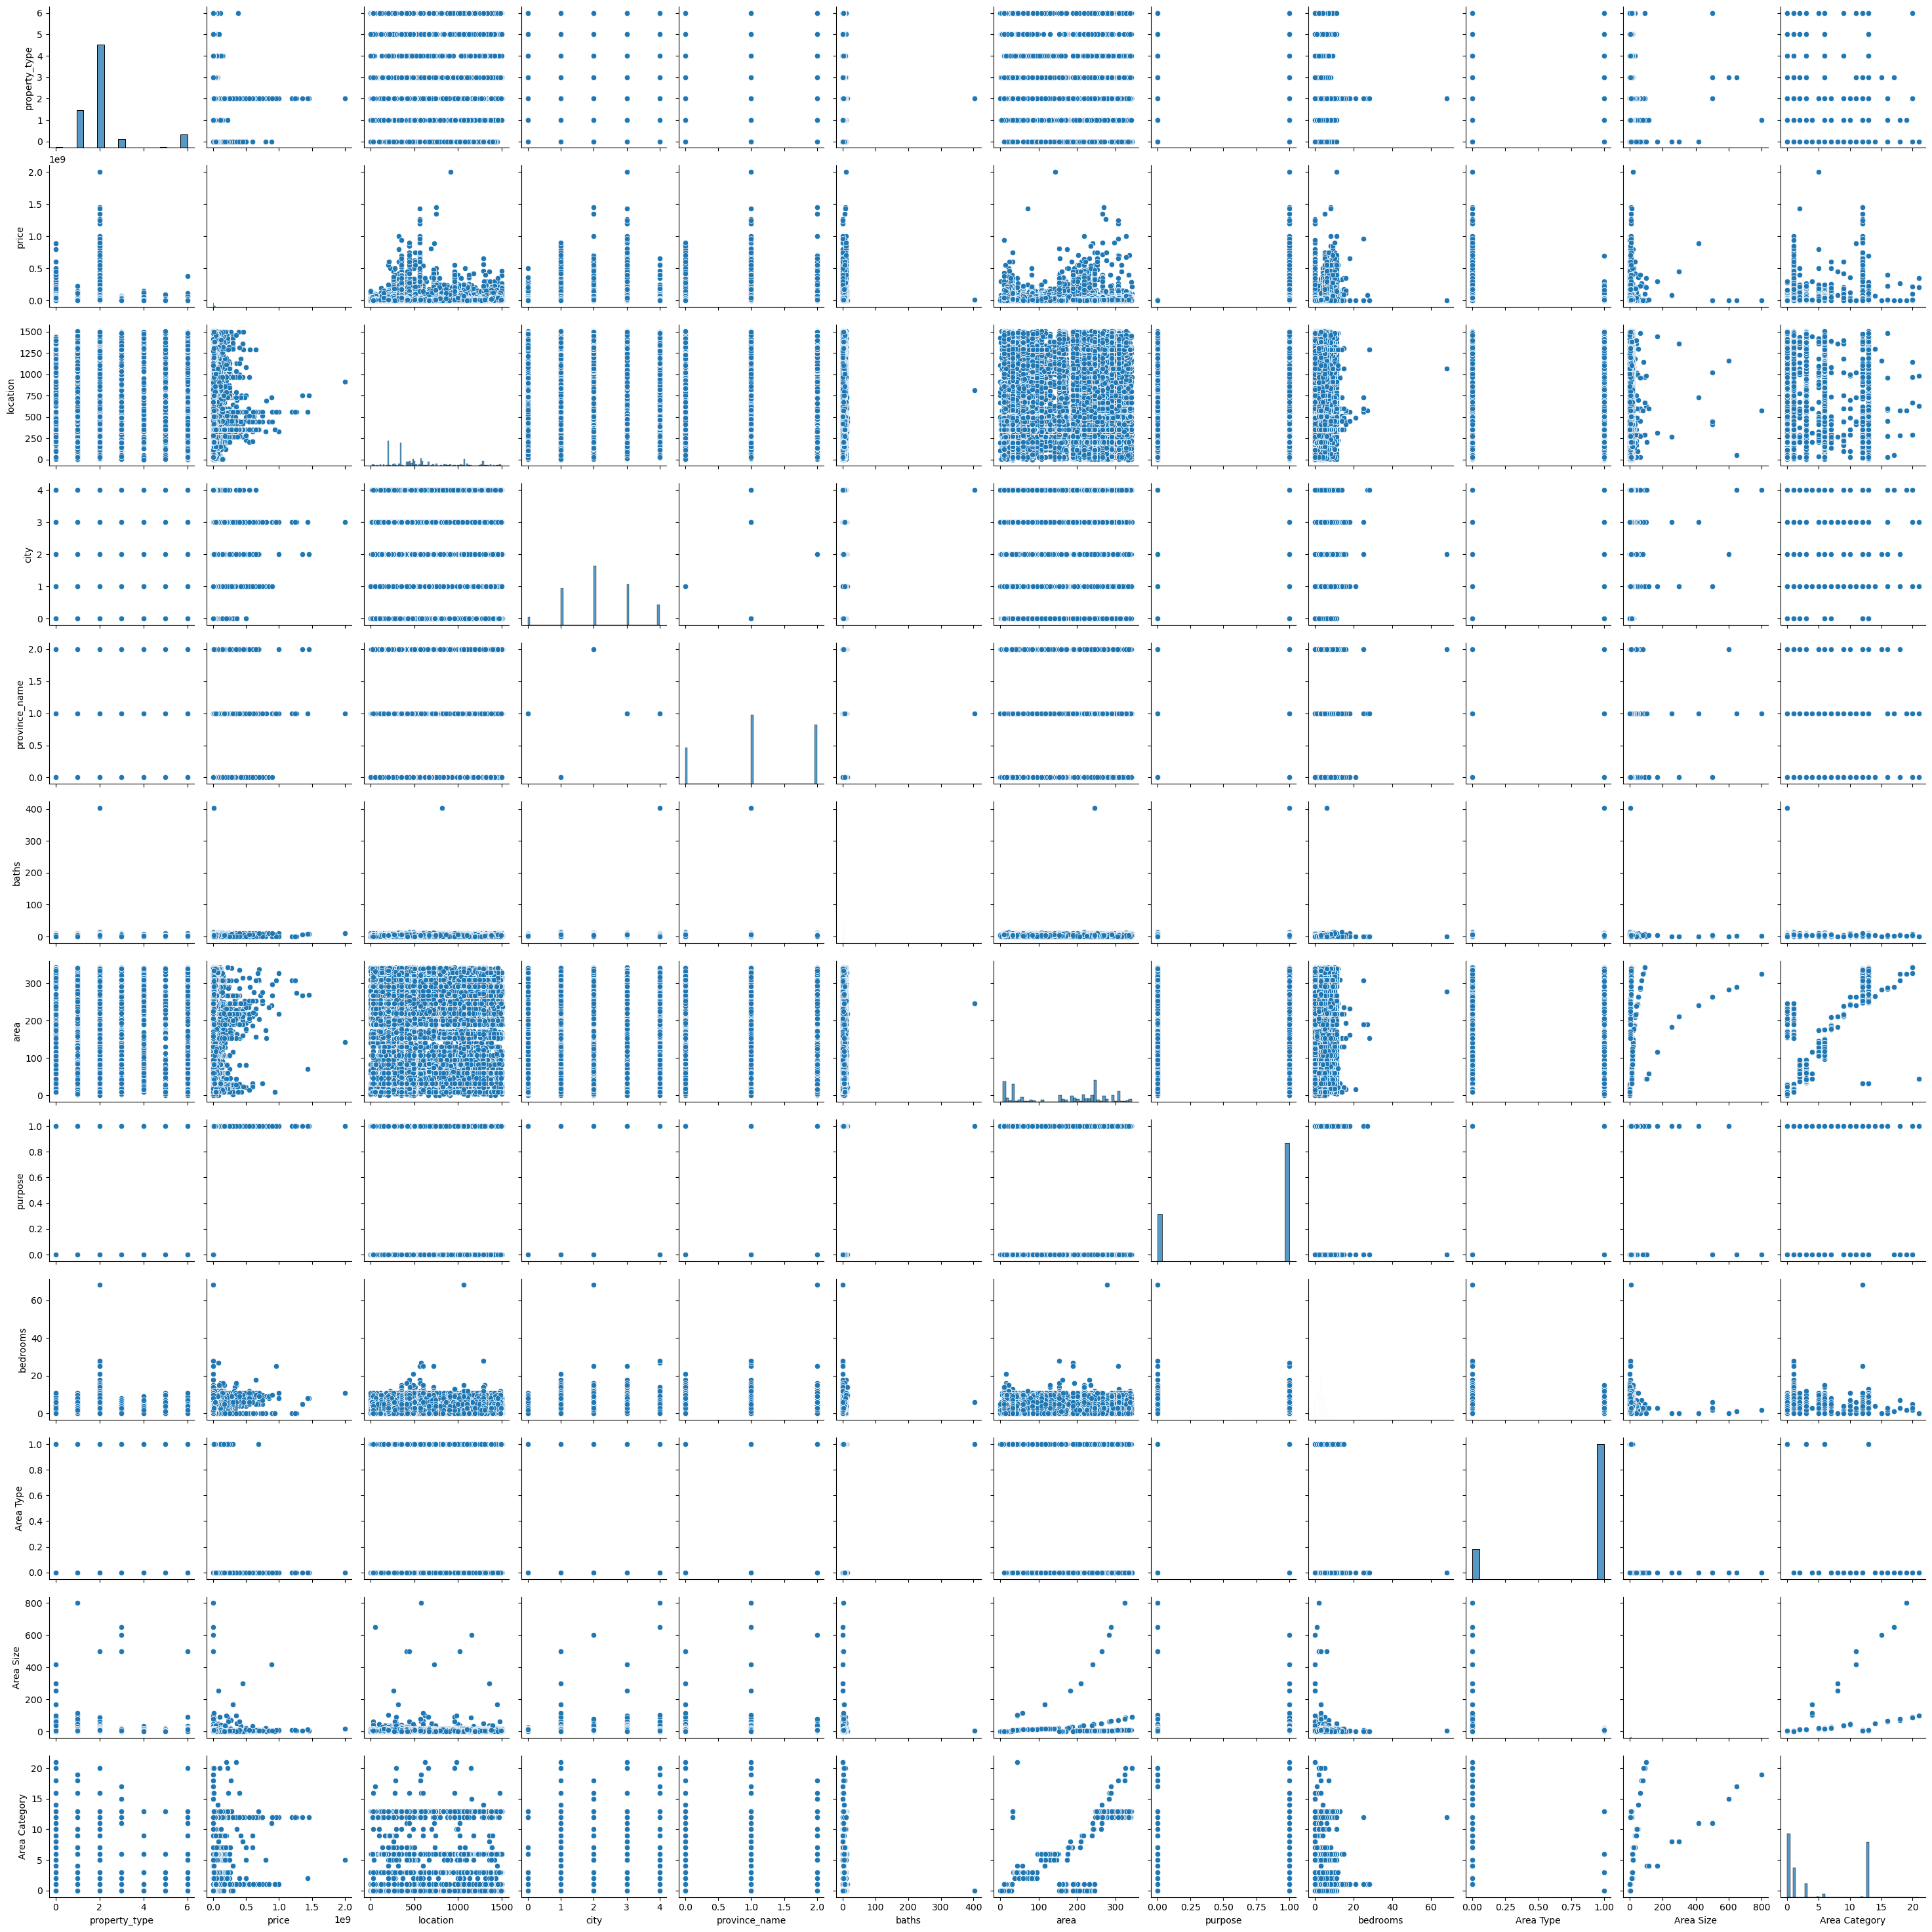